In [2]:
import constants
import torch
import importlib

from dataloaders.NYU_loader import get_dataloaders

device = constants.DEVICE

In [3]:
# Now import the data loaders

test_dl, train_dl = get_dataloaders(batch_size=16)

In [5]:
# Now we can attempt to train out model
import utils.trainers.unet_train
importlib.reload(utils.trainers.unet_train)

import models.basic_unet
importlib.reload(models.basic_unet)

import models.segnet
importlib.reload(models.segnet)

from torch import nn as nn

model = models.segnet.Segnet().to(device=device)
model = models.basic_unet.Unet().to(device=device)

optimizer = torch.optim.SGD(model.parameters(), lr=0.08, momentum=0.9)

loss_func = nn.MSELoss().to(device=device) 

train_Unet = utils.trainers.unet_train.train_Unet
loss1 = train_Unet(model, train_dl, optimizer=optimizer, loss_func=loss_func, num_epochs=5, show_result_every=1)

Beginning training on Unet with 5 epochs...
Epoch 0


100%|██████████| 41/41 [00:38<00:00,  1.08it/s]


Epoch 0 loss: 0.13868072628974915
Epoch 1


100%|██████████| 41/41 [00:39<00:00,  1.04it/s]


Epoch 1 loss: 0.07354672253131866
Epoch 2


100%|██████████| 41/41 [00:38<00:00,  1.08it/s]


Epoch 2 loss: 0.07429543137550354
Epoch 3


100%|██████████| 41/41 [00:42<00:00,  1.03s/it]


Epoch 3 loss: 0.07286674529314041
Epoch 4


100%|██████████| 41/41 [00:41<00:00,  1.00s/it]

Epoch 4 loss: 0.07133233547210693


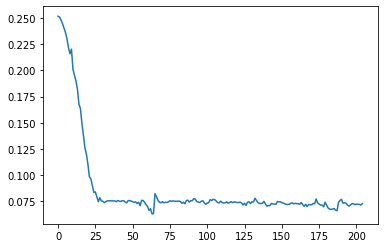

In [15]:
import matplotlib.pyplot as plt

plt.plot(loss1)

In [25]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
#lr_decay = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.1, patience=2, threshold=0.01, verbose=True)
loss_func = nn.MSELoss().to(device=device)

loss2 = train_Unet(model, train_dl, optimizer=optimizer, loss_func=loss_func, num_epochs=2, show_result_every=1)

Beginning training on Unet with 2 epochs...
Epoch 0


100%|██████████| 41/41 [00:41<00:00,  1.00s/it]


Epoch 0 loss: 0.06976250559091568
Epoch 1


100%|██████████| 41/41 [00:40<00:00,  1.00it/s]

Epoch 1 loss: 0.06976038217544556


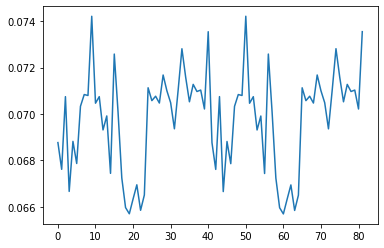

In [26]:
plt.plot(loss2)

In [1]:
data = next(iter(train_dl))

N = 2

x = data[0].to(device=device).float()
y = data[1].to(device=device).float()[N]

pred = model(x) 

import matplotlib.pyplot as plt
import utils.utils as utils

plt.figure() 
plt.imshow(x[N].cpu().permute(1, 2, 0))
plt.figure()
plt.imshow(y.cpu().squeeze(0))
plt.figure()

pred_mask = utils.convert_to_segmentation(pred) 

plt.imshow(pred_mask[N].cpu())

print(torch.unique(pred_mask)) 

NameError: name 'train_dl' is not defined

: 